# **▶ Partie 2 : Réduction dimensionnelle et ACP & SVM  ◀**


- 1 - Importation des jeux de test et d'entrainement et traitement :- 2 - tester :
- 2 - ACP
- 3 - Premier SVM  
- 4 - Automatisation du tuning
- 5 - Itération par itération

▶ Importation des différentes librairies


In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

import pandas as pd

import numpy as np
from numpy import vstack

import seaborn as sns

import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


Mounted at /content/gdrive


## ▶ 1) Importation des jeux de test et d'entrainement et traitement :

In [2]:
#df_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_train_data_set.csv")
#df_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_test_data_set.csv")


df_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/sample_churner_train_data_set.csv")
df_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/sample_churner_test_data_set.csv")


▶ Affichage de la dispertions de la variable churner :

Jeu de Train : nombre de 0 : 27171
Jeu de Train : nombre de 1 : 1827
Jeu de Test : nombre de 0 : 6793
Jeu de Test : nombre de 1 : 456



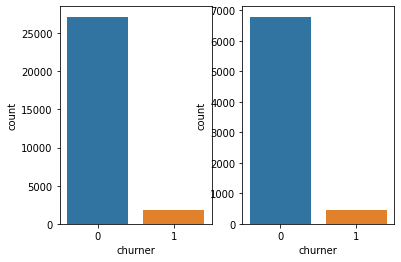

In [3]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_train, ax=ax[0])
sns.countplot(x = "churner", data=df_test, ax=ax[1])
fig.show()

print("Jeu de Train : nombre de 0 : " + str(np.sum(df_train['churner'] == 0)))
print("Jeu de Train : nombre de 1 : " + str(np.sum(df_train['churner'] == 1)))
print("Jeu de Test : nombre de 0 : " + str(np.sum(df_test['churner'] == 0)))
print("Jeu de Test : nombre de 1 : " + str(np.sum(df_test['churner'] == 1)))
print("")

▶ On sépare les variables explicatives de la variable à expliquer :

In [4]:
x_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:, -1]
x_test = df_test.iloc[:, 1:-1] 
y_test = df_test.iloc[:, -1]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(28998, 131) (28998,) (7249, 131) (7249,)


▶ Matrice de covariance entre les variables 

Text(0.5, 1.0, 'Covariance between different fearures')

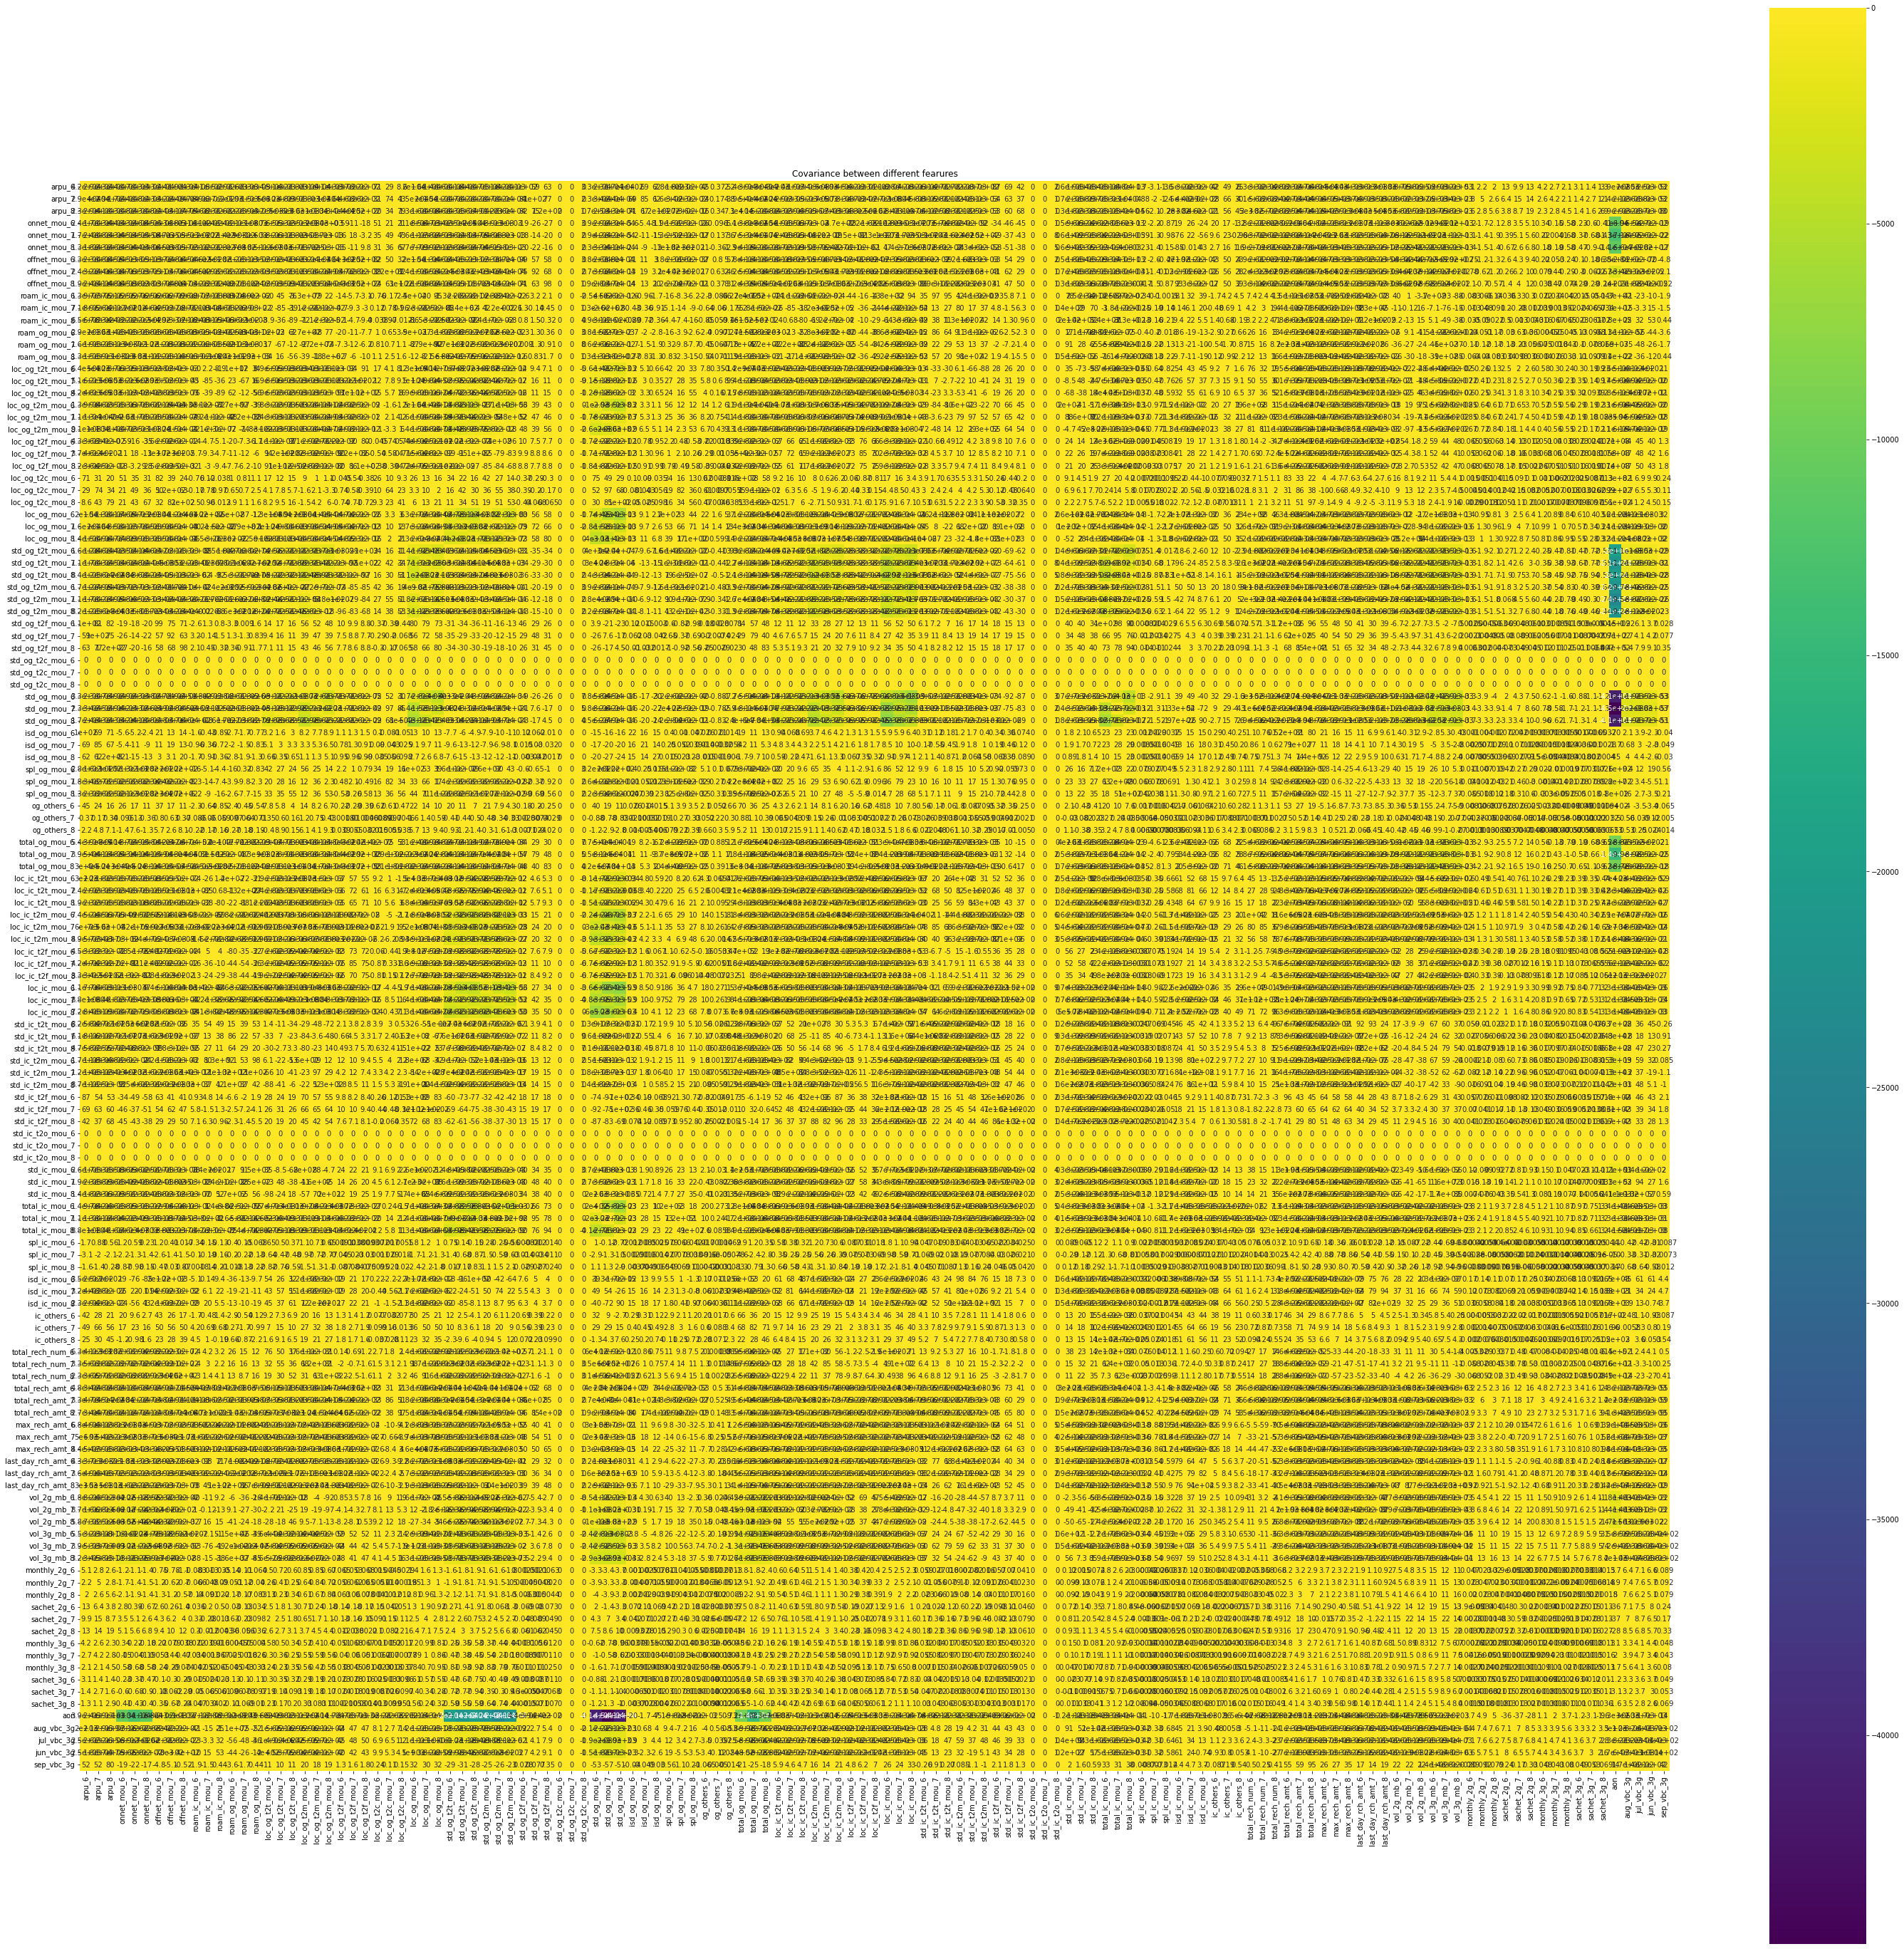

In [5]:
plt.figure(figsize=(50,50))
sns.heatmap(x_train.cov(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Covariance between different fearures')

▶ Matrice de corrélation entre variables :

Text(0.5, 1.0, 'Correlation between different fearures')

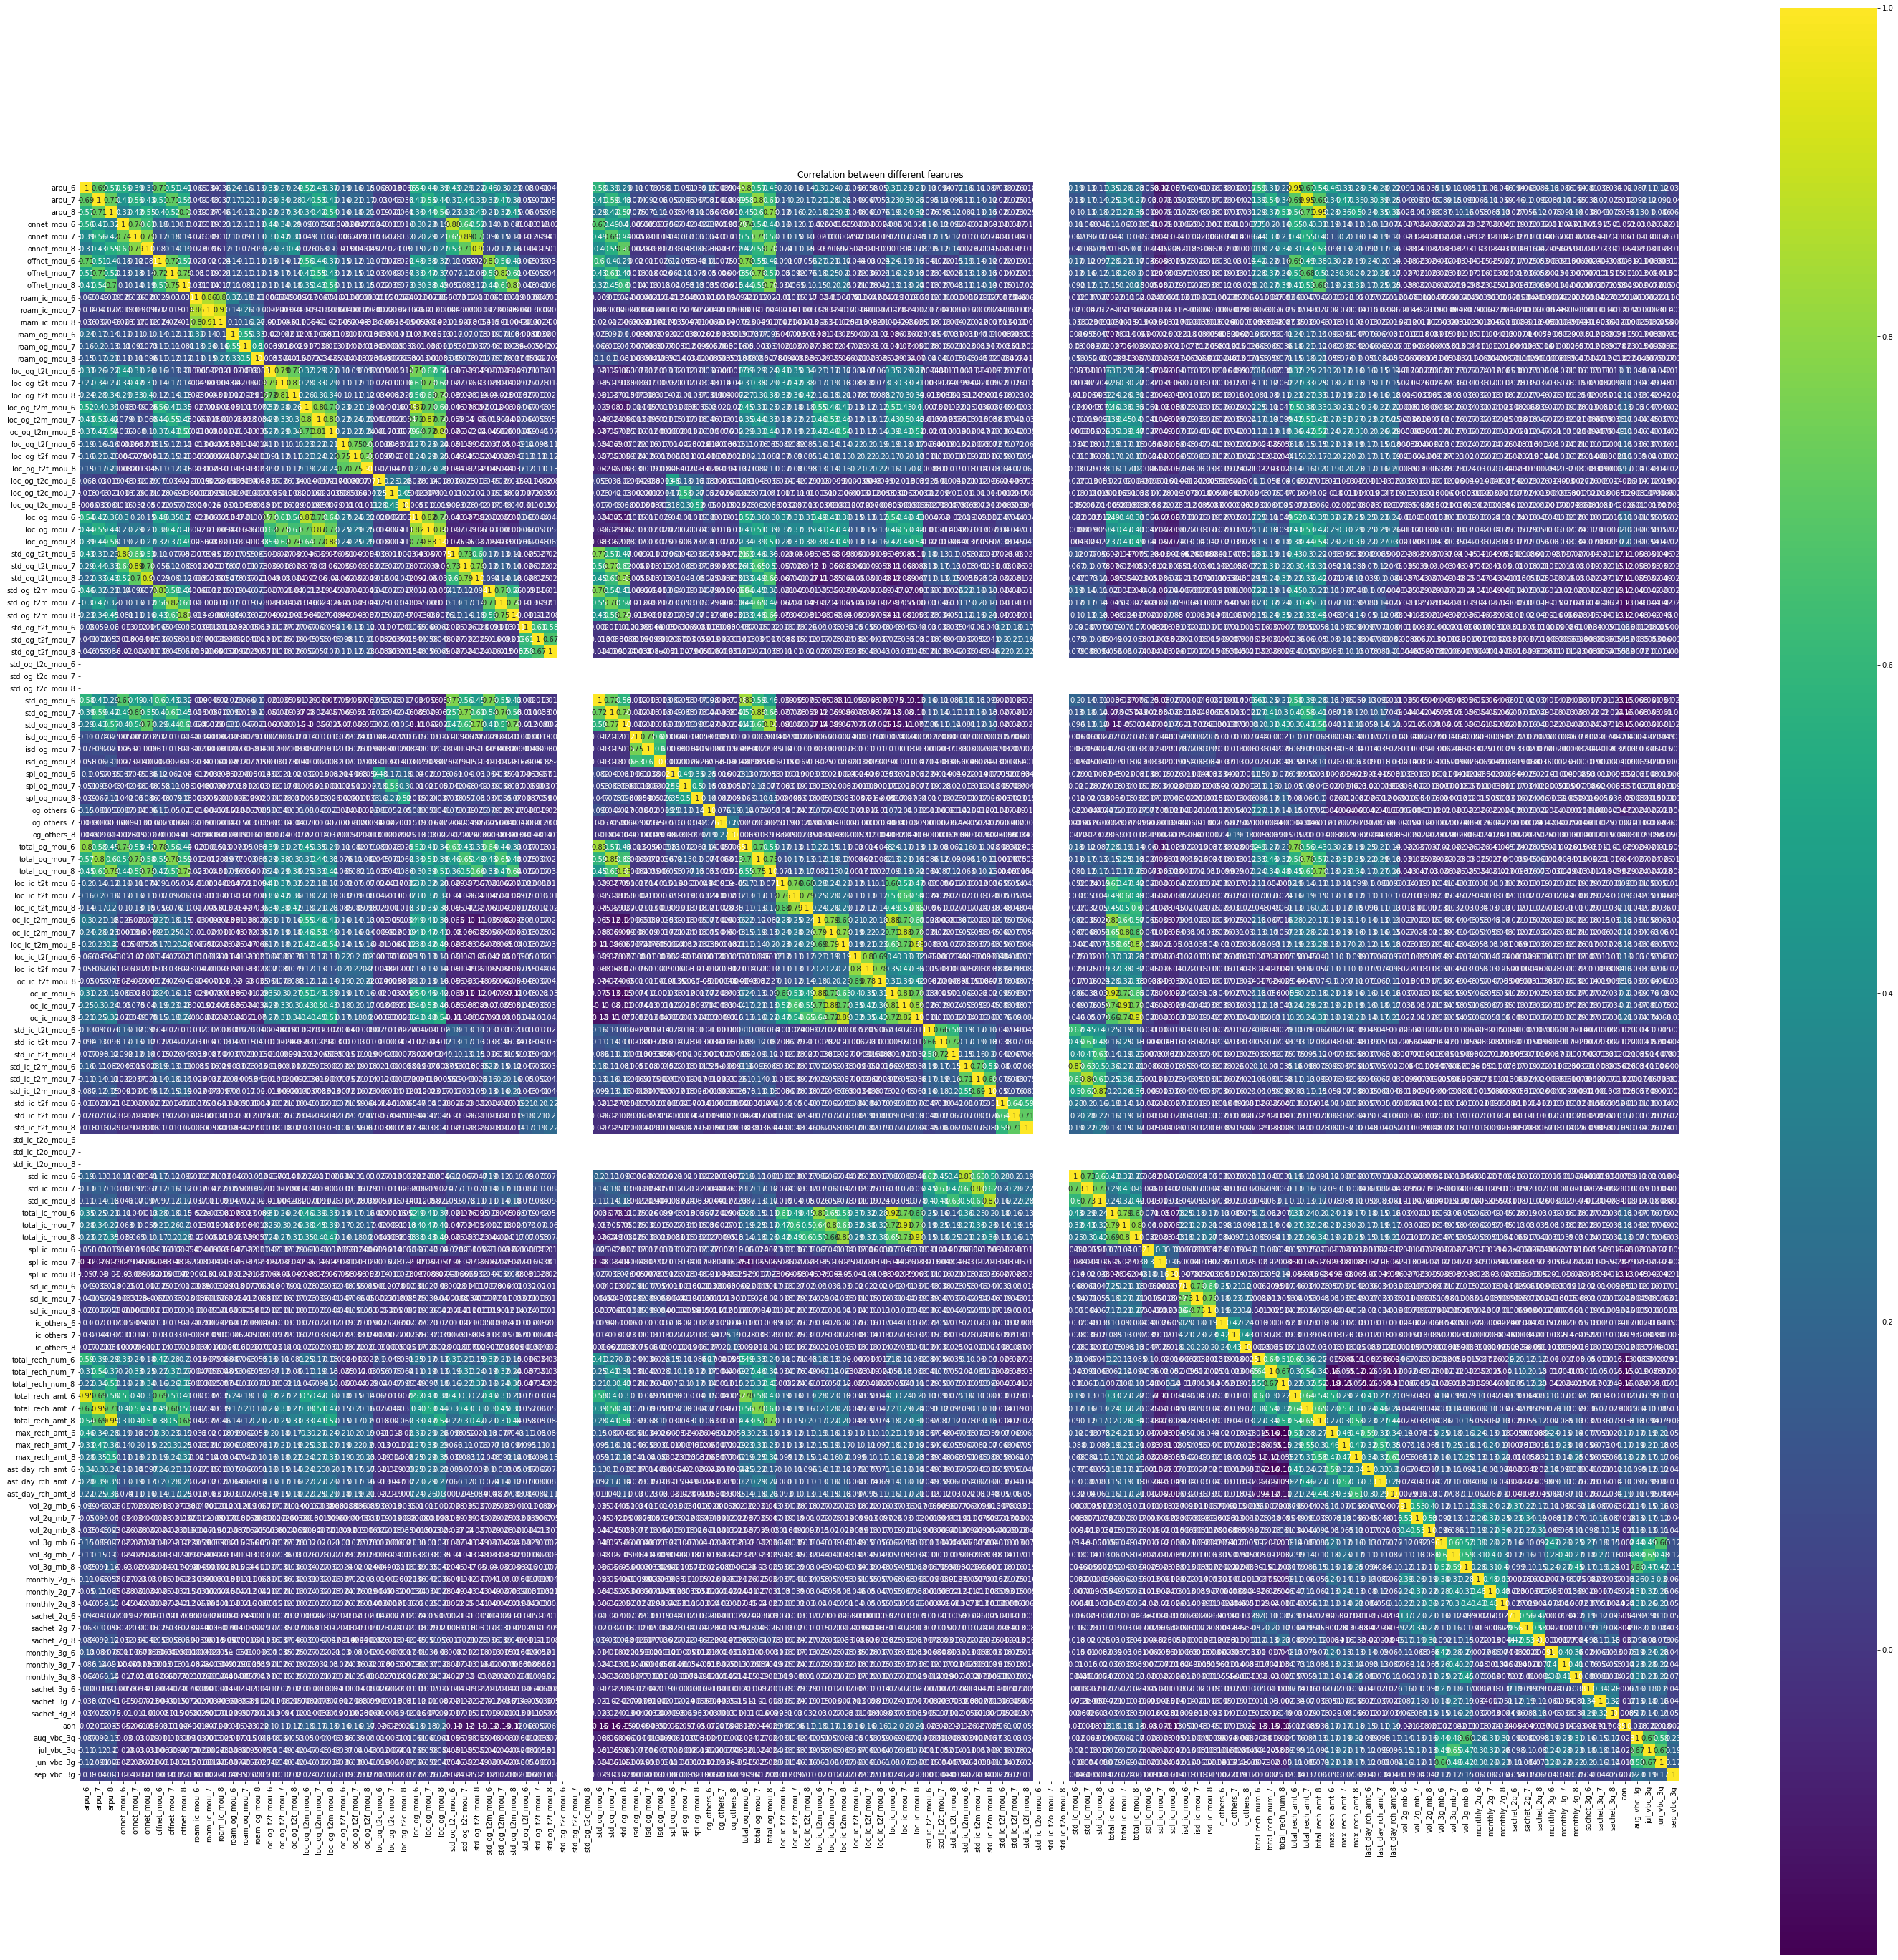

In [6]:
plt.figure(figsize=(50,50))
sns.heatmap(x_train.corr(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

# ▶ 2) ACP :

On commence par scale nos observations puis on réalise une ACP sur les 131 variables explicatives.

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

acp = PCA(n_components = 131)

df_acp_train = pd.DataFrame(acp.fit_transform(x_train))
df_acp_train

#df_acp_test = pd.DataFrame(acp.fit_transform(x_test))
#df_acp_test

0          1         2         3          4         5    \
0      -3.212751   0.329422 -0.932794  1.362090   0.469062 -0.201577   
1       6.211379  -4.840146  4.403175  1.181837   3.585791  1.684288   
2      -4.176199   0.301532 -0.431124 -0.973766  -0.247410 -0.078683   
3      16.874980  -6.766616 -2.984856 -6.633229   2.117158 -0.848146   
4      11.153315  15.443366  2.802122 -2.955098  10.372227  1.057939   
...          ...        ...       ...       ...        ...       ...   
28993  -0.822892  -0.791779 -0.134664 -0.551745  -1.335959 -1.527057   
28994  -3.372599  -0.668540  2.813932  1.611543   0.726191  1.373062   
28995   3.066054  -3.260934 -1.220284 -2.397994   0.883737 -2.198616   
28996  -2.518119   1.313020  0.280597 -0.684403   0.546605  2.703611   
28997   6.540328 -11.611609  2.088066  2.623052   3.541341  0.780914   

            6          7         8         9    ...           121  \
0      2.060386  -0.625812 -0.102068 -0.234427  ... -1.305333e-05   
1     -1.311975   2.161216  0.655379 -0.481925  ... -7.987585e-06   
2      0.170074   0.466006 -0.504033  0.160192  ... -7.278005e-07   
3      2.331331   4.312729 -2.910788 -0.123341  ... -1.453699e-05   
4     -2.893740  -0.742535 -0.517744  2.409095  ...  1.443942e-05   
...         ...        ...       ...       ...  ...           ...   
28993 -0.533856   0.290952  0.080552 -0.464344  ...  3.183956e-05   
28994 -0.639354   1.181132 -0.349532  0.449461  ... -2.636012e-07   
28995  1.629545  -0.458576 -0.984222 -0.238220  ...  1.574976e-05   
28996 -0.619458   1.455193 -0.121475  0.544891  ... -1.740599e-05   
28997 -6.390094 -11.133923  7.248359 -3.505979  ... -4.001749e-06   

                122           123           124           125           126  \
0     -2.832764e-06 -2.293222e-06 -1.330044e-06  2.124507e-16  1.767110e-16   
1     -1.680326e-06  8.336389e-06 -1.242843e-05 -9.531232e-17 -3.021463e-16   
2     -3.315953e-06  8.668300e-07 -3.615897e-07  1.520418e-16 -3.688663e-16   
3      1.095189e-07  5.345823e-08  5.253152e-06  2.449301e-16  4.128055e-16   
4      1.146144e-06 -1.588954e-05  4.293089e-06  1.580309e-16  2.300456e-16   
...             ...           ...           ...           ...           ...   
28993 -1.681673e-05  8.777360e-06 -9.185668e-06 -1.693744e-20 -2.556005e-17   
28994  8.488255e-06 -4.222985e-06 -3.833847e-06  6.754661e-18 -6.653490e-18   
28995 -8.126467e-07  1.533908e-07  1.636712e-05  1.392151e-17 -1.482889e-18   
28996  2.398077e-06  2.495822e-06 -7.886418e-06 -7.182130e-18  9.403071e-18   
28997 -5.567568e-06  1.225457e-07 -9.775184e-07  1.797736e-17  4.437124e-17   

                127           128           129           130  
0      2.313792e-16 -9.093657e-17  4.166135e-16 -1.536286e-16  
1     -3.101570e-16 -1.713225e-16 -1.763176e-17  1.898341e-17  
2      5.849626e-17 -1.889935e-16  1.686887e-16 -2.556972e-16  
3      1.039273e-16  5.900457e-17  9.041491e-17  1.848912e-16  
4      9.918358e-17 -2.144600e-17  8.489243e-17  6.390297e-17  
...             ...           ...           ...           ...  
28993  1.270758e-17  4.938741e-18  6.305249e-18 -1.211234e-20  
28994  1.816238e-17 -1.667336e-17  7.718328e-18  2.318477e-17  
28995  4.540389e-18 -5.439530e-18  3.997224e-18 -5.301052e-18  
28996  8.136405e-18 -1.574383e-17 -1.158705e-17  1.360715e-17  
28997 -3.378764e-18 -2.467363e-18 -3.412475e-17  1.572203e-17  

[28998 rows x 131 columns]

▶ On affiche les valeurs propres dans l'ordre croissant :

Text(0, 0.5, 'Variances expliquée')

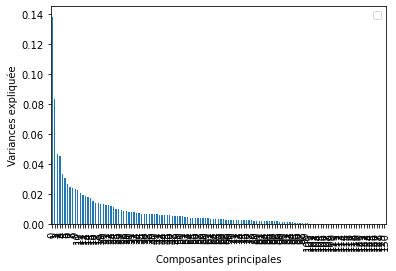

In [8]:
pd.DataFrame(acp.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Composantes principales')
plt.ylabel('Variances expliquée')

In [9]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(131)], 
        "Variance expliquée" : acp.explained_variance_,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0        Dim1        1.727338e+01                  14.0                   14.0
1        Dim2        1.040852e+01                   8.0                   22.0
2        Dim3        5.787736e+00                   5.0                   27.0
3        Dim4        5.683280e+00                   5.0                   31.0
4        Dim5        4.119884e+00                   3.0                   35.0
..        ...                 ...                   ...                    ...
126    Dim127        1.029492e-31                   0.0                  100.0
127    Dim128        1.029492e-31                   0.0                  100.0
128    Dim129        1.029492e-31                   0.0                  100.0
129    Dim130        1.029492e-31                   0.0                  100.0
130    Dim131        1.029492e-31                   0.0                  100.0

[131 rows x 4 columns]

▶ On sélectionne les 24 premières composantes principales avec la règle de Kaiser :

In [10]:
df_acp_trainf = df_acp_train.iloc[:,0:24]
df_acp_trainf

0          1         2         3          4         5   \
0      -3.212751   0.329422 -0.932794  1.362090   0.469062 -0.201577   
1       6.211379  -4.840146  4.403175  1.181837   3.585791  1.684288   
2      -4.176199   0.301532 -0.431124 -0.973766  -0.247410 -0.078683   
3      16.874980  -6.766616 -2.984856 -6.633229   2.117158 -0.848146   
4      11.153315  15.443366  2.802122 -2.955098  10.372227  1.057939   
...          ...        ...       ...       ...        ...       ...   
28993  -0.822892  -0.791779 -0.134664 -0.551745  -1.335959 -1.527057   
28994  -3.372599  -0.668540  2.813932  1.611543   0.726191  1.373062   
28995   3.066054  -3.260934 -1.220284 -2.397994   0.883737 -2.198616   
28996  -2.518119   1.313020  0.280597 -0.684403   0.546605  2.703611   
28997   6.540328 -11.611609  2.088066  2.623052   3.541341  0.780914   

             6          7         8         9   ...        14        15  \
0      2.060386  -0.625812 -0.102068 -0.234427  ... -0.144645  0.165219   
1     -1.311975   2.161216  0.655379 -0.481925  ...  4.532299  7.153882   
2      0.170074   0.466006 -0.504033  0.160192  ... -0.441284 -0.466520   
3      2.331331   4.312729 -2.910788 -0.123341  ...  2.143715 -2.017585   
4     -2.893740  -0.742535 -0.517744  2.409095  ... -0.357871  2.510323   
...         ...        ...       ...       ...  ...       ...       ...   
28993 -0.533856   0.290952  0.080552 -0.464344  ... -0.236109  1.401630   
28994 -0.639354   1.181132 -0.349532  0.449461  ...  0.615417  1.189199   
28995  1.629545  -0.458576 -0.984222 -0.238220  ...  2.081491 -1.976410   
28996 -0.619458   1.455193 -0.121475  0.544891  ... -0.312280 -0.940294   
28997 -6.390094 -11.133923  7.248359 -3.505979  ...  6.533387 -6.848486   

             16        17        18        19        20        21        22  \
0     -0.097687  0.191363 -0.000990 -0.314348  0.640398  0.043694 -0.346984   
1      4.398379 -3.373143  0.276986  1.197049  0.596438  1.256577  1.129269   
2      0.692553 -0.305440  0.291583  0.161931 -0.555240 -0.244499  1.001137   
3      0.632277 -2.033804  0.860091 -0.234076  0.819211  1.628990 -0.281400   
4     -4.520915  4.308502  0.964849 -1.560643 -0.042749 -0.374822 -0.227246   
...         ...       ...       ...       ...       ...       ...       ...   
28993 -0.808037  0.428837 -0.366422  0.737565 -0.361841 -0.206821  0.009280   
28994 -0.579067  0.343012  0.155521  0.480409 -1.006760 -0.264157  0.143117   
28995  0.865293  1.316688 -0.801490  0.996622 -1.120455 -1.412468 -0.331480   
28996 -0.316624 -0.286946 -0.331927 -0.083684 -0.833252 -0.076451 -0.169039   
28997  8.441016  3.416880 -6.174052  3.475086  0.749349 -7.711419 -1.089181   

             23  
0      0.157092  
1     -2.119950  
2     -0.905148  
3      0.019217  
4      0.902970  
...         ...  
28993  0.318763  
28994 -0.472115  
28995  0.167579  
28996 -0.450866  
28997  0.232355  

[28998 rows x 24 columns]

## ▶ 3) Premier SVM :

On utilise la fonction SVC() de sktearn :
- paramètre auto
- kernel : lineaire 

In [11]:
classifier = SVC(kernel = 'linear') 
classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [12]:
#Prediction sur le Test set
y_pred = classifier.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6793
           1       0.00      0.00      0.00       456

    accuracy                           0.94      7249
   macro avg       0.47      0.50      0.48      7249
weighted avg       0.88      0.94      0.91      7249



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6793 0 456 0
AUC :  0.9370947716926472
Sensibilité :  1.0
Spécificité :  0.0
Précision :  0.9370947716926472
Error rate :  0.06290522830735279
F mesure :  0.9675259934482268
5727


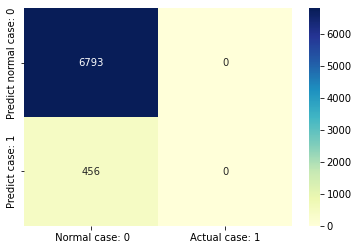

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp , fn, tp)

AUC=accuracy_score(y_test, y_pred)
sensitivity = tn / (tn+fp)
specificity = tp / (tp+fn)
precision = tn / (tn + fn)
error_rate = 1 - AUC
F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
print("AUC : ", AUC)
print("Sensibilité : ", sensitivity)  
print("Spécificité : ", specificity)
print("Précision : ", precision)
print("Error rate : ", error_rate)
print("F mesure : ", F_mesure)

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                  index=[ 'Predict normal case: 0','Predict case: 1']) 
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 

print(len(classifier.support_vectors_))


## ▶ 4) Automatisation du tuning : 

sklearn permet l'automatisation de la recherche des meilleurs paramètres (Cost, Gamma, kernel) grâce à *GridSearchCV()*.

Colab version gratuite étant limité à 6h de compilation, cette méthode n'est pas la meilleure.


In [ ]:
#'degree':[1,2,3,4,5,6],
param_grid = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

 
grid = GridSearchCV(SVC(), param_grid)
 
grid.fit(x_train, y_train)


print("Best Parameters:\n", grid.best_params_)

print("Best Estimators:\n", grid.best_estimator_)


In [ ]:
model = SVC(C=_, kernel='_', gamma='_').fit(x_train,y_train)

y_pred = model.predict(x_test)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

AUC=accuracy_score(y_test, y_pred)
sensitivity = tn / (tn+fp)
specificity = tp / (tp+fn)
precision = tn / (tn + fn)
error_rate = 1 - AUC
F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
print("AUC : ", AUC)
print("Sensibilité : ", sensitivity)  
print("Spécificité : ", specificity)
print("Précision : ", precision)
print("Error rate : ", error_rate)
print("F mesure : ", F_mesure)

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                  index=[ 'Predict normal case: 0','Predict case: 1']) 
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 

## 5) Itération par itération :

Pour réaliser nos test de différents paramètres on utilise un ensemble de boucles qui vont parcourir nos paramètres :
- cost : {0.1, 1, 1000, 100 000, 1 000 000}
- gamma : {10, 1 , 0.1, 0.01, 0.001}
- kernel : {rbf, poly, sigmoid, linear}

Pour chaque combinaison on enregistre les métrics. 

In [ ]:
C = [0.1, 1, 1000, 100000, 1000000]
Gamma = [10, 1, 0.1, 0.01, 0.001]
#kernel = ['rbf','poly','sigmoid','linear']
kernel = 'rbf'

result_f = []


for element_c in C :
  for element_g in Gamma :
    result_tab = [] 
    start_time_exec = time.time()
    result_tab.append(kernel)
    result_tab.append(element_c)
    result_tab.append(element_g)
    
    model = SVC(C= element_c, kernel=kernel, gamma=element_g).fit(x_train,y_train)
              
    y_pred = model.predict(x_test)

    result_tab.append(len(model.support_vectors_))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    result_tab.append(tn)
    result_tab.append(fp)
    result_tab.append(fn)
    result_tab.append(tp)

    AUC=accuracy_score(y_test, y_pred)
    sensitivity = tn / (tn+fp)
    specificity = tp / (tp+fn)
    precision = tn / (tn + fn)
    error_rate = 1 - AUC
    F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
    print("Cost : ", element_c)
    print("Gamme : ", element_g)
    print("")
    print("AUC : ", AUC)
    print("Sensibilité : ", sensitivity)  
    print("Spécificité : ", specificity)
    print("Précision : ", precision)
    print("Error rate : ", error_rate)
    print("F mesure : ", F_mesure)

    result_tab.append(AUC)
    result_tab.append(sensitivity)
    result_tab.append(specificity)
    result_tab.append(precision)
    result_tab.append(error_rate)
    result_tab.append(F_mesure)

    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                      index=[ 'Predict normal case: 0','Predict case: 1']) 
    #sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 
    print(cm_matrix)

    temps_exec = round((time.time() - start_time_exec),2)
    result_tab.append(temps_exec)

    result_f.append(result_tab)
    print("")
    print("")
    print("")


Cost :  0.1
Gamme :  10

AUC :  0.9370947716926472
Sensibilité :  1.0
Spécificité :  0.0
Précision :  0.9370947716926472
Error rate :  0.06290522830735279
F mesure :  0.9675259934482268
                         Normal case: 0  Actual case: 1
Predict normal case: 0             6793               0
Predict case: 1                     456               0



Cost :  0.1
Gamme :  1

AUC :  0.9370947716926472
Sensibilité :  1.0
Spécificité :  0.0
Précision :  0.9370947716926472
Error rate :  0.06290522830735279
F mesure :  0.9675259934482268
                         Normal case: 0  Actual case: 1
Predict normal case: 0             6793               0
Predict case: 1                     456               0



Cost :  0.1
Gamme :  0.1

AUC :  0.9370947716926472
Sensibilité :  1.0
Spécificité :  0.0
Précision :  0.9370947716926472
Error rate :  0.06290522830735279
F mesure :  0.9675259934482268
                         Normal case: 0  Actual case: 1
Predict normal case: 0             6793     

▶ Export des résultats

In [ ]:
#print((result_f))
result = pd.DataFrame(result_f, columns=["kernel", "Cost", "Gamma", "nbr vecteur", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_svm.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
C = [0.1, 1, 1000, 100000, 1000000]
Gamma = [10, 1, 0.1, 0.01, 0.001]
#kernel = ['rbf','poly','sigmoid','linear']
kernel = 'poly'

result_f = []


for element_c in C :
  for element_g in Gamma :
    result_tab = [] 
    start_time_exec = time.time()
    result_tab.append(kernel)
    result_tab.append(element_c)
    result_tab.append(element_g)
    
    model = SVC(C= element_c, kernel=kernel, gamma=element_g).fit(x_train,y_train)
              
    y_pred = model.predict(x_test)

    result_tab.append(len(model.support_vectors_))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    result_tab.append(tn)
    result_tab.append(fp)
    result_tab.append(fn)
    result_tab.append(tp)

    AUC=accuracy_score(y_test, y_pred)
    sensitivity = tn / (tn+fp)
    specificity = tp / (tp+fn)
    precision = tn / (tn + fn)
    error_rate = 1 - AUC
    F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
    print("Cost : ", element_c)
    print("Gamme : ", element_g)
    print("")
    print("AUC : ", AUC)
    print("Sensibilité : ", sensitivity)  
    print("Spécificité : ", specificity)
    print("Précision : ", precision)
    print("Error rate : ", error_rate)
    print("F mesure : ", F_mesure)

    result_tab.append(AUC)
    result_tab.append(sensitivity)
    result_tab.append(specificity)
    result_tab.append(precision)
    result_tab.append(error_rate)
    result_tab.append(F_mesure)

    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                      index=[ 'Predict normal case: 0','Predict case: 1']) 
    #sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 
    print(cm_matrix)

    temps_exec = round((time.time() - start_time_exec),2)
    result_tab.append(temps_exec)

    result_f.append(result_tab)
    print("")
    print("")
    print("")


In [ ]:
#print((result_f))
result = pd.DataFrame(result_f, columns=["kernel", "Cost", "Gamma", "nbr vecteur", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_svm.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

In [ ]:
C = [0.1, 1, 1000, 100000, 1000000]
Gamma = [10, 1, 0.1, 0.01, 0.001]
#kernel = ['rbf','poly','sigmoid','linear']
kernel = 'sigmoid'

result_f = []


for element_c in C :
  for element_g in Gamma :
    result_tab = [] 
    start_time_exec = time.time()
    result_tab.append(kernel)
    result_tab.append(element_c)
    result_tab.append(element_g)
    
    model = SVC(C= element_c, kernel=kernel, gamma=element_g).fit(x_train,y_train)
              
    y_pred = model.predict(x_test)

    result_tab.append(len(model.support_vectors_))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    result_tab.append(tn)
    result_tab.append(fp)
    result_tab.append(fn)
    result_tab.append(tp)

    AUC=accuracy_score(y_test, y_pred)
    sensitivity = tn / (tn+fp)
    specificity = tp / (tp+fn)
    precision = tn / (tn + fn)
    error_rate = 1 - AUC
    F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
    print("Cost : ", element_c)
    print("Gamme : ", element_g)
    print("")
    print("AUC : ", AUC)
    print("Sensibilité : ", sensitivity)  
    print("Spécificité : ", specificity)
    print("Précision : ", precision)
    print("Error rate : ", error_rate)
    print("F mesure : ", F_mesure)

    result_tab.append(AUC)
    result_tab.append(sensitivity)
    result_tab.append(specificity)
    result_tab.append(precision)
    result_tab.append(error_rate)
    result_tab.append(F_mesure)

    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                      index=[ 'Predict normal case: 0','Predict case: 1']) 
    #sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 
    print(cm_matrix)

    temps_exec = round((time.time() - start_time_exec),2)
    result_tab.append(temps_exec)

    result_f.append(result_tab)
    print("")
    print("")
    print("")


In [ ]:
#print((result_f))
result = pd.DataFrame(result_f, columns=["kernel", "Cost", "Gamma", "nbr vecteur", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_svm.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

In [ ]:
C = [0.1, 1, 1000, 100000, 1000000]
Gamma = [10, 1, 0.1, 0.01, 0.001]
#kernel = ['rbf','poly','sigmoid','linear']
kernel = 'linear'

result_f = []


for element_c in C :
  for element_g in Gamma :
    result_tab = [] 
    start_time_exec = time.time()
    result_tab.append(kernel)
    result_tab.append(element_c)
    result_tab.append(element_g)
    
    model = SVC(C= element_c, kernel=kernel, gamma=element_g).fit(x_train,y_train)
              
    y_pred = model.predict(x_test)

    result_tab.append(len(model.support_vectors_))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    result_tab.append(tn)
    result_tab.append(fp)
    result_tab.append(fn)
    result_tab.append(tp)

    AUC=accuracy_score(y_test, y_pred)
    sensitivity = tn / (tn+fp)
    specificity = tp / (tp+fn)
    precision = tn / (tn + fn)
    error_rate = 1 - AUC
    F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
    print("Cost : ", element_c)
    print("Gamme : ", element_g)
    print("")
    print("AUC : ", AUC)
    print("Sensibilité : ", sensitivity)  
    print("Spécificité : ", specificity)
    print("Précision : ", precision)
    print("Error rate : ", error_rate)
    print("F mesure : ", F_mesure)

    result_tab.append(AUC)
    result_tab.append(sensitivity)
    result_tab.append(specificity)
    result_tab.append(precision)
    result_tab.append(error_rate)
    result_tab.append(F_mesure)

    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                      index=[ 'Predict normal case: 0','Predict case: 1']) 
    #sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 
    print(cm_matrix)

    temps_exec = round((time.time() - start_time_exec),2)
    result_tab.append(temps_exec)

    result_f.append(result_tab)
    print("")
    print("")
    print("")


In [ ]:
#print((result_f))
result = pd.DataFrame(result_f, columns=["kernel", "Cost", "Gamma", "nbr vecteur", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_svm.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)